In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import necessary libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from scipy.stats import norm 
import statistics 

import warnings
warnings.filterwarnings('ignore')

Data have been collected from a large housing cooperative in Norway, with 1,113 apartments and 2,321 residents. A new infrastructure for EV charging was installed from December 2018. From December 2018 to January 2020, charging sessions were registered by 97 user IDs; 82 of these IDs appeared to be still active at the end of the period. In the data provided with this article, Central European Time (CET) zone is used


***Dataset 1: EV charging reports***
The CSV file “Dataset 1” describes 6,878 individual charging sessions, registered by 97 user
IDs from December 2018 to January 2020. The charging reports include plug-in time, plug-out
time and charged energy per charging session. Each charging session is connected to a user
ID, charger ID and address.

***Dataset 2: Hourly EV charging loads and idle capacity, for all sessions and users individually***
The CSV file “Dataset 2” describes EV charging loads and non-charging idle capacity for each
user and all EV charging sessions individually. Charging power 3.6 kW or 7.2 kW is assumed, with immediate charging after plug-in. The non-charging idle time reflects the flexibility potential for the charging session. Synthetic idle capacity is the energy load that could potentially have been charged during the idle times.

***Dataset 3 and 4: Hourly EV charging loads and idle capacity, aggregated for private or shared CPs***
The CSV files “Dataset 3a” and “Dataset 3b” describe EV charging loads and idle capacity,
aggregated for users with private (3a) or shared (3b) CPs. Charging power 3.6 kW or 7.2 kW
is assumed, with immediate charging after plug-in.

***Dataset 5: Hourly smart meter data from garage Bl2***
The CSV file describes hourly smart meter data from garage Bl2, with aggregated electricity use each hour. The EVs were parked in 24 locations, whereof 22 locations have an AMS-meter measuring aggregated EV-charging at that location, with hourly resolution AMS-measurements from a main garage, where 33% of the charging sessions took place (2,243 charging sessions).

***Dataset 6: Local traffic density***
Local hourly traffic density in 5 nearby traffic locations. The data includes an hourly count of vehicles shorter than 5.6 meter, from December 2018 to January 2020.

***Dataset 7: Weather Data***
Local Weather Data of Trondheim, Norway.The data includes weather features like temperature, rainfall etc from December 2018 to January 2020.

**Reading Dataset**

In [3]:
# Read in the csv to a DataFrame
df_1 = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/Dataset 1_EV charging reports.csv', sep=';')
df_2 = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/Dataset 2_Hourly EV loads - Per user.csv', sep=';')
df_3 = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/Dataset 3a_Hourly EV loads - Aggregated private.csv', sep=';')
df_4 = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/Dataset 3b_Hourly EV loads - Aggregated shared.csv', sep=';')
df_5 = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/Dataset 5_AMS data from garage Bl2.csv', sep=';')
df_6 = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/Dataset 6_Local traffic distribution.csv', sep=';')
df_7 = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/Norway_Trondheim_ExactLoc_Weather.csv')


**Analyzing the Data**

Let’s start by getting an overview of the dataset and examining its structure 

In [4]:
# Print first 5 rows
df_1.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,"0,3","0,05",Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,"0,87","0,136666667",Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,"29,87","8,216388889",Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,"15,56","24,41972222",Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,"3,62","0,970555556",Dec,Monday,late evening (21-midnight),Less than 3 hours


In [5]:
# Print information about the data:
df_1.info()
df_2.info()
df_3.info()
df_4.info()
df_5.info()
df_6.info()
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_ID         6878 non-null   int64  
 1   Garage_ID          6878 non-null   object 
 2   User_ID            6878 non-null   object 
 3   User_type          6878 non-null   object 
 4   Shared_ID          1412 non-null   object 
 5   Start_plugin       6878 non-null   object 
 6   Start_plugin_hour  6878 non-null   int64  
 7   End_plugout        6844 non-null   object 
 8   End_plugout_hour   6844 non-null   float64
 9   El_kWh             6878 non-null   object 
 10  Duration_hours     6844 non-null   object 
 11  month_plugin       6878 non-null   object 
 12  weekdays_plugin    6878 non-null   object 
 13  Plugin_category    6878 non-null   object 
 14  Duration_category  6844 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 806.1+ KB
<class 'pand

In [6]:
# Checiking for duplicated values
df_1.duplicated().sum()
df_2.duplicated().sum()
df_3.duplicated().sum()
df_4.duplicated().sum()
df_5.duplicated().sum()
df_6.duplicated().sum()
df_7.duplicated().sum()

0

0

0

0

0

0

0

In [7]:
# Looking for null values
df_1.isna().sum()
df_2.isna().sum()
df_3.isna().sum()
df_4.isna().sum()
df_5.isna().sum()
df_6.isna().sum()
df_7.isna().sum()

session_ID              0
Garage_ID               0
User_ID                 0
User_type               0
Shared_ID            5466
Start_plugin            0
Start_plugin_hour       0
End_plugout            34
End_plugout_hour       34
El_kWh                  0
Duration_hours         34
month_plugin            0
weekdays_plugin         0
Plugin_category         0
Duration_category      34
dtype: int64

date_from              0
date_to                0
User_ID              390
session_ID           390
Synthetic_3_6kW    57046
Synthetic_7_2kW    69199
Flex_3_6kW         26070
Flex_7_2kW         15532
dtype: int64

date_from          0
daily_hour         0
weekday            0
month              0
Synthetic_3_6kW    0
Synthetic_7_2kW    0
Flex_3_6kW         0
Flex_7_2kW         0
n_private          0
dtype: int64

date_from          0
daily_hour         0
weekday            0
month              0
Synthetic_3_6kW    0
Synthetic_7_2kW    0
Flex_3_6kW         0
Flex_7_2kW         0
n_shared           0
dtype: int64

date_from                   0
date_to                     2
month                       0
AMS_kWh                     8
Synthetic_3_6kW          1166
Synthetic_7_2kW          1166
Simultaneous_if_3_6kW    4278
dtype: int64

Date_from                               0
Date_to                                 0
KROPPAN BRU                             0
MOHOLTLIA                               0
SELSBAKK                                0
MOHOLT RAMPE 2                          0
Jonsvannsveien vest for Steinanvegen    0
dtype: int64

Unnamed: 0           0
clouds               0
datetime             0
dewpt                0
dhi                  0
dni                  0
ghi                  0
max_dhi              0
max_dni              0
max_ghi              0
max_temp             0
max_temp_ts          0
max_uv               0
max_wind_dir         0
max_wind_spd         0
max_wind_spd_ts      0
min_temp             0
min_temp_ts          0
precip               0
precip_gpm           0
pres                 0
revision_status      0
rh                   0
slp                  0
snow                 0
snow_depth         427
solar_rad            0
t_dhi                0
t_dni                0
t_ghi                0
t_solar_rad          0
temp                 0
ts                   0
wind_dir             0
wind_gust_spd        0
wind_spd             0
dtype: int64

In [8]:
# Checking shape
df_1.shape
df_2.shape
df_3.shape
df_4.shape
df_5.shape
df_6.shape
df_7.shape


(6878, 15)

(88156, 8)

(9757, 9)

(9288, 9)

(9466, 7)

(10248, 7)

(427, 36)

We will merge data first and then deal with missing values

In [9]:
# Print first 5 rows
df_1.head()
df_2.head()
df_3.head()
df_4.head()
df_5.head()
df_6.head()
df_7.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,"0,3","0,05",Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,"0,87","0,136666667",Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,"29,87","8,216388889",Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,"15,56","24,41972222",Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,"3,62","0,970555556",Dec,Monday,late evening (21-midnight),Less than 3 hours


,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,1.0,"0,3","0,3",NaN,"0,06"
1,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,2.0,"0,87","0,87",NaN,"0,114"
2,21.12.2018 11:00,21.12.2018 12:00,AdO3-4,3.0,"1,62","3,24",NaN,NaN
3,21.12.2018 12:00,21.12.2018 13:00,AdO3-4,3.0,"3,6","7,2",NaN,NaN
4,21.12.2018 13:00,21.12.2018 14:00,AdO3-4,3.0,"3,6","7,2",NaN,NaN


,date_from,daily_hour,weekday,month,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW,n_private
0,21.12.2018 10:00,10,Friday,Dec,"1,17","1,17",0,"0,174",1
1,21.12.2018 11:00,11,Friday,Dec,"1,62","3,24",0,0,1
2,21.12.2018 12:00,12,Friday,Dec,"3,6","7,2",0,0,1
3,21.12.2018 13:00,13,Friday,Dec,"3,6","7,2",0,0,1
4,21.12.2018 14:00,14,Friday,Dec,"3,6","7,2",0,0,1


,date_from,daily_hour,weekday,month,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW,n_shared
0,10.01.2019 00:00,0,Thursday,Jan,0,0,0,0,1
1,10.01.2019 01:00,1,Thursday,Jan,0,0,0,0,1
2,10.01.2019 02:00,2,Thursday,Jan,0,0,0,0,1
3,10.01.2019 03:00,3,Thursday,Jan,0,0,0,0,1
4,10.01.2019 04:00,4,Thursday,Jan,0,0,0,0,1


,date_from,date_to,month,AMS_kWh,Synthetic_3_6kW,Synthetic_7_2kW,Simultaneous_if_3_6kW
0,02.01.2019 19:00,02.01.2019 20:00,Jan,"0,05","0,06","0,12",1.0
1,02.01.2019 20:00,02.01.2019 21:00,Jan,"6,6","3,6","7,2",1.0
2,02.01.2019 21:00,02.01.2019 22:00,Jan,"6,8","3,6","7,2",1.0
3,02.01.2019 22:00,02.01.2019 23:00,Jan,"1,45","3,6","0,12",1.0
4,02.01.2019 23:00,03.01.2019 00:00,Jan,"0,05","3,6",0,1.0


,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen
0,01.12.2018 00:00,01.12.2018 01:00,639,0,0,4,144
1,01.12.2018 01:00,01.12.2018 02:00,487,153,115,21,83
2,01.12.2018 02:00,01.12.2018 03:00,408,85,75,10,69
3,01.12.2018 03:00,01.12.2018 04:00,282,89,56,8,39
4,01.12.2018 04:00,01.12.2018 05:00,165,64,34,3,25


,Unnamed: 0,clouds,datetime,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,0,66,2018-12-01,-1.7,5,40,6,34,288,48,...,2,127,966,144,52,7.4,1543618800,187,12.8,5.5
1,1,64,2018-12-02,-2.8,5,38,6,33,281,46,...,5,123,923,135,126,5.4,1543705200,177,10.8,3.6
2,2,100,2018-12-03,-0.7,5,37,5,33,273,44,...,1,119,881,128,21,2.4,1543791600,142,4.8,1.5
3,3,93,2018-12-04,-0.5,5,35,5,32,266,42,...,1,115,842,121,22,0.8,1543878000,234,12.8,3.9
4,4,87,2018-12-05,-1.9,5,34,5,32,260,41,...,2,111,804,114,39,-0.4,1543964400,206,13.6,3.7


`El_kWh` is our target variable.

Potential Features: 

`Start_plugin_hour, Start_plugin_date, Duration_hours, month_plugin, weekdays_plugin`,

`Weather-related features` (clouds, dewpt, dhi, dni, ghi, etc.): Weather conditions can impact energy consumption.

`Garage_ID, User_ID, User_type, Shared_ID`: Categorical features related to the user and garage information.


# <span style="color:red;"># Check the merge! Check dtype before merge!</span>
exp. Session_ID at df1 is int and in df2 is float

We will merge data.
First, we will merge df_1 with df_6 and then merge it with df_7
Second, we will merge df_2 with df_3 and with df_4 and df_5
third, we will merhe first and second step together

Then we will deal with datatypes
And Features

I have 7 datasets, where some of them have missong values. Same time, they have common columns where in one dataset it is no missing values, while in another one values are missing. By joining them i want to fill missing values in one dataset by using onother one. So why I'm not using inner join.


In [10]:
df_1['El_kWh'] = df_1['El_kWh'].str.replace(',', '').astype(float)  # Convert to numerical
df_1['Duration_hours'] = df_1['Duration_hours'].str.replace(',', '').astype(float)  # Convert to numerical

In [11]:
df_1['Start_plugin'] = pd.to_datetime(df_1['Start_plugin'], format='%d.%m.%Y %H:%M')

df_1['Start_plugin'] = df_1['Start_plugin'].dt.strftime('%d.%m.%Y %H:00')

Now we will merge df_1 with df_2

In [12]:
# Merge the data based on the hour values
merged_data = df_1.merge(df_6, left_on='Start_plugin', right_on='Date_from', )

# Drop unnecessary date and hour columns
merged_data.drop([], axis=1, inplace=True)

In [13]:
merged_data.shape

(6878, 22)

merge df_1 + df_6 with df_7

To merge with df_7, we will need to change `Start_plugin` to datetime format and extract date components.

In [14]:
merged_data['Start_plugin'] = pd.to_datetime(merged_data['Start_plugin'], format='%d.%m.%Y %H:%M')

merged_data['Start_plugin_date'] = merged_data['Start_plugin'].dt.date

In [15]:
df_7['datetime'] = pd.to_datetime(df_7['datetime'])
merged_data['Start_plugin_date'] = pd.to_datetime(merged_data['Start_plugin_date'])

In [16]:
merged_data.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,Plugin_category,Duration_category,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,Start_plugin_date
0,1,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:23,10.0,3.0,...,late morning (9-12),Less than 3 hours,21.12.2018 10:00,21.12.2018 11:00,3244,1632,545,194,622,2018-12-21
1,2,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:32,10.0,87.0,...,late morning (9-12),Less than 3 hours,21.12.2018 10:00,21.12.2018 11:00,3244,1632,545,194,622,2018-12-21
2,3,AdO3,AdO3-4,Private,NaN,2018-12-21 11:00:00,11,21.12.2018 19:46,19.0,2987.0,...,late morning (9-12),Between 6 and 9 hours,21.12.2018 11:00,21.12.2018 12:00,3605,1691,605,230,771,2018-12-21
3,4,AdO3,AdO3-2,Private,NaN,2018-12-22 16:00:00,16,23.12.2018 16:40,16.0,1556.0,...,late afternoon (15-18),More than 18 hours,22.12.2018 16:00,22.12.2018 17:00,3052,1484,453,224,694,2018-12-22
4,5,AdO3,AdO3-2,Private,NaN,2018-12-24 22:00:00,22,24.12.2018 23:02,23.0,362.0,...,late evening (21-midnight),Less than 3 hours,24.12.2018 22:00,24.12.2018 23:00,1390,693,226,83,353,2018-12-24


In [17]:
merged_data.columns

Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category', 'Date_from', 'Date_to',
       'KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK', 'MOHOLT RAMPE 2',
       'Jonsvannsveien vest for Steinanvegen', 'Start_plugin_date'],
      dtype='object')

In [18]:
# Merge the data based on the hour values
merged_data = merged_data.merge(
    df_7,
    left_on='Start_plugin_date',
    right_on='datetime'
)

# Drop unnecessary date and hour columns
merged_data.drop(['Date_from','Date_to','Unnamed: 0','datetime'], axis=1, inplace=True)

In [19]:
merged_data.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,1,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:23,10.0,3.0,...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
1,2,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:32,10.0,87.0,...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
2,3,AdO3,AdO3-4,Private,NaN,2018-12-21 11:00:00,11,21.12.2018 19:46,19.0,2987.0,...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
3,4,AdO3,AdO3-2,Private,NaN,2018-12-22 16:00:00,16,23.12.2018 16:40,16.0,1556.0,...,2,81,548,70,58,-2.2,1545433200,137,9.2,1.9
4,5,AdO3,AdO3-2,Private,NaN,2018-12-24 22:00:00,22,24.12.2018 23:02,23.0,362.0,...,0,82,558,72,7,1.1,1545606000,203,12.4,3.8


In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   session_ID                            6878 non-null   int64         
 1   Garage_ID                             6878 non-null   object        
 2   User_ID                               6878 non-null   object        
 3   User_type                             6878 non-null   object        
 4   Shared_ID                             1412 non-null   object        
 5   Start_plugin                          6878 non-null   datetime64[ns]
 6   Start_plugin_hour                     6878 non-null   int64         
 7   End_plugout                           6844 non-null   object        
 8   End_plugout_hour                      6844 non-null   float64       
 9   El_kWh                                6878 non-null   float64       
 10  

snow_depth  has 0 values, so we will drop it.

In [21]:
merged_data = merged_data.drop(['snow_depth'],axis=1)

In [22]:
merged_data.shape

(6878, 54)

In [23]:
# Merge df_2, df_3, and df_4 based on the date_from column
merged_data2 = df_2.merge(df_3, on='date_from', how='inner', suffixes=('_x', '_y'))
merged_data2 = merged_data2.merge(df_4, on='date_from', how='inner', suffixes=('_x', '_y'))

# Identify duplicated columns
duplicates = [col[:-2] for col in merged_data2.columns if col.endswith(('_x', '_y'))]

# Fill missing values using duplicated columns
for col in duplicates:
    merged_data2[col] = merged_data2[col + '_x'].combine_first(merged_data2[col + '_y'])

# Drop duplicated columns
merged_data2.drop(columns=[col + '_x' for col in duplicates] + [col + '_y' for col in duplicates], inplace=True)


In [24]:
merged_data2.head()

,date_from,date_to,User_ID,session_ID,n_private,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW,n_shared,daily_hour,weekday,month
0,10.01.2019 00:00,10.01.2019 01:00,AdO1-2,25.0,5,0,0,"3,6","7,2",1,0,Thursday,Jan
1,10.01.2019 00:00,10.01.2019 01:00,Bl2-4,24.0,5,0,0,"3,6","7,2",1,0,Thursday,Jan
2,10.01.2019 01:00,10.01.2019 02:00,Bl2-4,24.0,5,0,0,"3,6","7,2",1,1,Thursday,Jan
3,10.01.2019 01:00,10.01.2019 02:00,AdO1-2,25.0,5,0,0,"3,6","7,2",1,1,Thursday,Jan
4,10.01.2019 02:00,10.01.2019 03:00,AdO1-2,25.0,5,0,0,"3,6","7,2",1,2,Thursday,Jan


In [25]:
merged_data2.shape

(87665, 13)

In [26]:
merged_data2.isna().sum()

date_from            0
date_to              0
User_ID            158
session_ID         158
n_private            0
Synthetic_3_6kW      0
Synthetic_7_2kW      0
Flex_3_6kW           0
Flex_7_2kW           0
n_shared             0
daily_hour           0
weekday              0
month                0
dtype: int64

In [27]:

merged_data2 = merged_data2.merge(df_5, on='date_from', how='inner', suffixes=('_x', '_y'))

# Identify duplicated columns
duplicates = [col[:-2] for col in merged_data2.columns if col.endswith(('_x', '_y'))]

# Fill missing values using duplicated columns
for col in duplicates:
    merged_data2[col] = merged_data2[col + '_x'].combine_first(merged_data2[col + '_y'])

# Drop duplicated columns
merged_data2.drop(columns=[col + '_x' for col in duplicates] + [col + '_y' for col in duplicates], inplace=True)


In [28]:
merged_data2.head()

,date_from,User_ID,session_ID,n_private,Flex_3_6kW,Flex_7_2kW,n_shared,daily_hour,weekday,AMS_kWh,Simultaneous_if_3_6kW,date_to,Synthetic_3_6kW,Synthetic_7_2kW,month
0,10.01.2019 00:00,AdO1-2,25.0,5,"3,6","7,2",1,0,Thursday,0,NaN,10.01.2019 01:00,0,0,Jan
1,10.01.2019 00:00,Bl2-4,24.0,5,"3,6","7,2",1,0,Thursday,0,NaN,10.01.2019 01:00,0,0,Jan
2,10.01.2019 01:00,Bl2-4,24.0,5,"3,6","7,2",1,1,Thursday,"0,05",NaN,10.01.2019 02:00,0,0,Jan
3,10.01.2019 01:00,AdO1-2,25.0,5,"3,6","7,2",1,1,Thursday,"0,05",NaN,10.01.2019 02:00,0,0,Jan
4,10.01.2019 02:00,AdO1-2,25.0,5,"3,6","7,2",1,2,Thursday,"0,05",NaN,10.01.2019 03:00,0,0,Jan


In [29]:
merged_data2.shape

(87737, 15)

In [30]:
merged_data2.isna().sum()

date_from                    0
User_ID                    162
session_ID                 162
n_private                    0
Flex_3_6kW                   0
Flex_7_2kW                   0
n_shared                     0
daily_hour                   0
weekday                      0
AMS_kWh                     30
Simultaneous_if_3_6kW    26279
date_to                      0
Synthetic_3_6kW              0
Synthetic_7_2kW              0
month                        0
dtype: int64

# <span style="color:red;">Check this step, as I missing features after last merge</span>


In [31]:
merged_data3 = merged_data.merge(merged_data2, on=['session_ID', 'User_ID'], how='inner')
merged_data3 = merged_data3[merged_data.columns].drop_duplicates()

In [32]:
df_clean = merged_data3

In [33]:
df_clean.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,24,Bl2,Bl2-4,Private,NaN,2019-01-09 16:00:00,16,10.01.2019 10:20,10.0,187.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
11,25,AdO1,AdO1-2,Private,NaN,2019-01-09 20:00:00,20,10.01.2019 15:19,15.0,1038.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
27,28,UT9,Share-12,Shared,Shared-12,2019-01-10 16:00:00,16,10.01.2019 17:20,17.0,51.0,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
29,29,AdO1,AdO1-2,Private,NaN,2019-01-10 23:00:00,23,11.01.2019 18:10,18.0,835.0,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
49,30,UT9,Share-12,Shared,Shared-12,2019-01-11 15:00:00,15,11.01.2019 17:07,17.0,117.0,...,2,124,954,145,38,1.4,1547161200,260,23.6,7.0


In [34]:
df_clean.shape

(6853, 54)

In [35]:
df_clean.isna().sum()

session_ID                                 0
Garage_ID                                  0
User_ID                                    0
User_type                                  0
Shared_ID                               5442
Start_plugin                               0
Start_plugin_hour                          0
End_plugout                               34
End_plugout_hour                          34
El_kWh                                     0
Duration_hours                            34
month_plugin                               0
weekdays_plugin                            0
Plugin_category                            0
Duration_category                         34
KROPPAN BRU                                0
MOHOLTLIA                                  0
SELSBAKK                                   0
MOHOLT RAMPE 2                             0
Jonsvannsveien vest for Steinanvegen       0
Start_plugin_date                          0
clouds                                     0
dewpt     

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6853 entries, 0 to 87572
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   session_ID                            6853 non-null   int64         
 1   Garage_ID                             6853 non-null   object        
 2   User_ID                               6853 non-null   object        
 3   User_type                             6853 non-null   object        
 4   Shared_ID                             1411 non-null   object        
 5   Start_plugin                          6853 non-null   datetime64[ns]
 6   Start_plugin_hour                     6853 non-null   int64         
 7   End_plugout                           6819 non-null   object        
 8   End_plugout_hour                      6819 non-null   float64       
 9   El_kWh                                6853 non-null   float64       
 10  Dura

After analyzing data, we can see that  null values in `Shared_ID` column were mirroring Private `User_type` column. And as it was private and was shared with anyone, it was considered as NaN. And we decided to fill the NaN values as a Private values.

And we will drop all other as it has a very low percentege and wouldn't afect our analysis.

In [37]:
# Using filter to look at samples with `Shared_ID` NAN values
df_clean[df_clean['Shared_ID'].isna()]

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,24,Bl2,Bl2-4,Private,NaN,2019-01-09 16:00:00,16,10.01.2019 10:20,10.0,187.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
11,25,AdO1,AdO1-2,Private,NaN,2019-01-09 20:00:00,20,10.01.2019 15:19,15.0,1038.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
29,29,AdO1,AdO1-2,Private,NaN,2019-01-10 23:00:00,23,11.01.2019 18:10,18.0,835.0,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
96,38,AdO1,AdO1-2,Private,NaN,2019-01-12 18:00:00,18,13.01.2019 18:42,18.0,619.0,...,1,130,995,154,15,0.4,1547247600,223,10.4,2.1
121,39,AdO3,AdO3-2,Private,NaN,2019-01-12 21:00:00,21,13.01.2019 14:13,14.0,165.0,...,1,130,995,154,15,0.4,1547247600,223,10.4,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87557,6873,Bl2,Bl2-1,Private,NaN,2020-01-31 17:00:00,17,31.01.2020 17:59,17.0,101.0,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
87558,6874,UT15,UT15-2,Private,NaN,2020-01-31 17:00:00,17,31.01.2020 22:29,22.0,1343.0,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
87564,6875,AsO10,AsO10-1,Private,NaN,2020-01-31 18:00:00,18,31.01.2020 21:43,21.0,91.0,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
87568,6876,Bl2,Bl2-1,Private,NaN,2020-01-31 19:00:00,19,31.01.2020 20:37,20.0,428.0,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1


In [38]:
private = (df_clean['User_type'] == 'Private') & (df_clean['Shared_ID'].isna())
print(private)

0         True
11        True
27       False
29        True
49       False
         ...  
87558     True
87564     True
87568     True
87570     True
87572    False
Length: 6853, dtype: bool


In [39]:
sum(private)

5442

In [40]:
# Replasment with Private
df_clean.loc[private, 'Shared_ID'] = 'Private'

In [41]:
# Sanity check
df_clean.isna().sum()

session_ID                               0
Garage_ID                                0
User_ID                                  0
User_type                                0
Shared_ID                                0
Start_plugin                             0
Start_plugin_hour                        0
End_plugout                             34
End_plugout_hour                        34
El_kWh                                   0
Duration_hours                          34
month_plugin                             0
weekdays_plugin                          0
Plugin_category                          0
Duration_category                       34
KROPPAN BRU                              0
MOHOLTLIA                                0
SELSBAKK                                 0
MOHOLT RAMPE 2                           0
Jonsvannsveien vest for Steinanvegen     0
Start_plugin_date                        0
clouds                                   0
dewpt                                    0
dhi        

In [42]:
# Using filter to look at samples with `Shared_ID` NAN values
df_clean[df_clean[['End_plugout', 'End_plugout_hour', 'Duration_hours', 'Duration_category']].isna()]

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87558,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87564,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87568,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87570,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_clean.isna().sum()/100

session_ID                              0.00
Garage_ID                               0.00
User_ID                                 0.00
User_type                               0.00
Shared_ID                               0.00
Start_plugin                            0.00
Start_plugin_hour                       0.00
End_plugout                             0.34
End_plugout_hour                        0.34
El_kWh                                  0.00
Duration_hours                          0.34
month_plugin                            0.00
weekdays_plugin                         0.00
Plugin_category                         0.00
Duration_category                       0.34
KROPPAN BRU                             0.00
MOHOLTLIA                               0.00
SELSBAKK                                0.00
MOHOLT RAMPE 2                          0.00
Jonsvannsveien vest for Steinanvegen    0.00
Start_plugin_date                       0.00
clouds                                  0.00
dewpt     

As we can see, all columns in the DataFrame have missing values for all rows, and the percentage of missing NaN values is relatively small. In this case, dropping these rows with missing values would have a minimal impact on the overall dataset, and it is a reasonable approach, as the missing values do not contain meaningful information for analysis. 

In [44]:
# Droping NaN Values
df_clean = df_clean.dropna()

In [45]:
# Sanity check
df_clean.isna().sum()

session_ID                              0
Garage_ID                               0
User_ID                                 0
User_type                               0
Shared_ID                               0
Start_plugin                            0
Start_plugin_hour                       0
End_plugout                             0
End_plugout_hour                        0
El_kWh                                  0
Duration_hours                          0
month_plugin                            0
weekdays_plugin                         0
Plugin_category                         0
Duration_category                       0
KROPPAN BRU                             0
MOHOLTLIA                               0
SELSBAKK                                0
MOHOLT RAMPE 2                          0
Jonsvannsveien vest for Steinanvegen    0
Start_plugin_date                       0
clouds                                  0
dewpt                                   0
dhi                               

# <span style="color:red;">I lost couple features like `3_2kW and 7_2kW`. check merge process!</span>


## Finaly our data is clean and we can move forvard with our EDA

In [46]:
df_clean.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,24,Bl2,Bl2-4,Private,Private,2019-01-09 16:00:00,16,10.01.2019 10:20,10.0,187.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
11,25,AdO1,AdO1-2,Private,Private,2019-01-09 20:00:00,20,10.01.2019 15:19,15.0,1038.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
27,28,UT9,Share-12,Shared,Shared-12,2019-01-10 16:00:00,16,10.01.2019 17:20,17.0,51.0,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
29,29,AdO1,AdO1-2,Private,Private,2019-01-10 23:00:00,23,11.01.2019 18:10,18.0,835.0,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
49,30,UT9,Share-12,Shared,Shared-12,2019-01-11 15:00:00,15,11.01.2019 17:07,17.0,117.0,...,2,124,954,145,38,1.4,1547161200,260,23.6,7.0


In [47]:
df_clean.columns

Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category', 'KROPPAN BRU', 'MOHOLTLIA',
       'SELSBAKK', 'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen',
       'Start_plugin_date', 'clouds', 'dewpt', 'dhi', 'dni', 'ghi', 'max_dhi',
       'max_dni', 'max_ghi', 'max_temp', 'max_temp_ts', 'max_uv',
       'max_wind_dir', 'max_wind_spd', 'max_wind_spd_ts', 'min_temp',
       'min_temp_ts', 'precip', 'precip_gpm', 'pres', 'revision_status', 'rh',
       'slp', 'snow', 'solar_rad', 't_dhi', 't_dni', 't_ghi', 't_solar_rad',
       'temp', 'ts', 'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')

In [48]:
df_clean.describe()

,session_ID,Start_plugin,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,Start_plugin_date,clouds,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
count,6819.000000,6819,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000
mean,3442.837659,2019-10-02 01:26:52.318521600,16.325121,12.536736,1153.908051,2.395272e+09,169.399765,664.660654,2019-10-01 09:07:21.882973952,75.767855,...,48.472210,538.781640,4520.410324,2117.209122,1163.141956,4.095645,1.569916e+09,177.935328,9.632116,2.604575
min,24.000000,2019-01-09 16:00:00,0.000000,0.000000,1.000000,1.000000e+00,0.000000,3.000000,2019-01-09 00:00:00,0.000000,...,0.000000,81.000000,547.000000,70.000000,7.000000,-9.800000,1.546988e+09,43.000000,2.400000,1.000000
25%,1730.500000,2019-08-05 21:00:00,15.000000,7.000000,406.000000,1.115347e+09,108.000000,444.000000,2019-08-05 00:00:00,68.000000,...,2.000000,140.000000,1092.000000,172.000000,56.000000,0.500000,1.564956e+09,143.000000,5.600000,1.800000
50%,3435.000000,2019-11-02 16:00:00,17.000000,12.000000,805.000000,1.612528e+09,164.000000,651.000000,2019-11-02 00:00:00,85.000000,...,14.000000,307.000000,2705.000000,632.000000,338.000000,2.900000,1.572649e+09,179.000000,8.400000,2.200000
75%,5146.500000,2019-12-18 19:00:00,19.000000,17.000000,1496.500000,2.913472e+09,212.000000,833.000000,2019-12-18 00:00:00,94.000000,...,72.000000,895.000000,7677.000000,3618.000000,1728.000000,7.100000,1.576624e+09,217.000000,12.400000,3.100000
max,6878.000000,2020-01-31 20:00:00,23.000000,23.000000,8086.000000,9.996389e+09,461.000000,1382.000000,2020-01-31 00:00:00,100.000000,...,322.000000,1556.000000,12786.000000,8133.000000,7730.000000,26.600000,1.580425e+09,309.000000,28.400000,7.200000
std,1979.057552,NaN,4.366534,5.253134,1160.889467,2.331315e+09,90.032508,317.625069,NaN,25.138675,...,69.249134,479.304303,4011.279037,2593.347235,1662.035872,6.020140,8.657091e+06,49.945330,5.027197,1.239229


In [49]:
df_clean.shape

(6819, 54)

array([[<Axes: title={'center': 'session_ID'}>,
        <Axes: title={'center': 'Start_plugin'}>,
        <Axes: title={'center': 'Start_plugin_hour'}>,
        <Axes: title={'center': 'End_plugout_hour'}>,
        <Axes: title={'center': 'El_kWh'}>,
        <Axes: title={'center': 'Duration_hours'}>],
       [<Axes: title={'center': 'MOHOLT RAMPE 2'}>,
        <Axes: title={'center': 'Jonsvannsveien vest for Steinanvegen'}>,
        <Axes: title={'center': 'Start_plugin_date'}>,
        <Axes: title={'center': 'clouds'}>,
        <Axes: title={'center': 'dewpt'}>,
        <Axes: title={'center': 'dhi'}>],
       [<Axes: title={'center': 'dni'}>, <Axes: title={'center': 'ghi'}>,
        <Axes: title={'center': 'max_dhi'}>,
        <Axes: title={'center': 'max_dni'}>,
        <Axes: title={'center': 'max_ghi'}>,
        <Axes: title={'center': 'max_temp'}>],
       [<Axes: title={'center': 'max_temp_ts'}>,
        <Axes: title={'center': 'max_uv'}>,
        <Axes: title={'center': 'max_

Text(0.5, 1.02, 'Histograms of Numeric Variables')

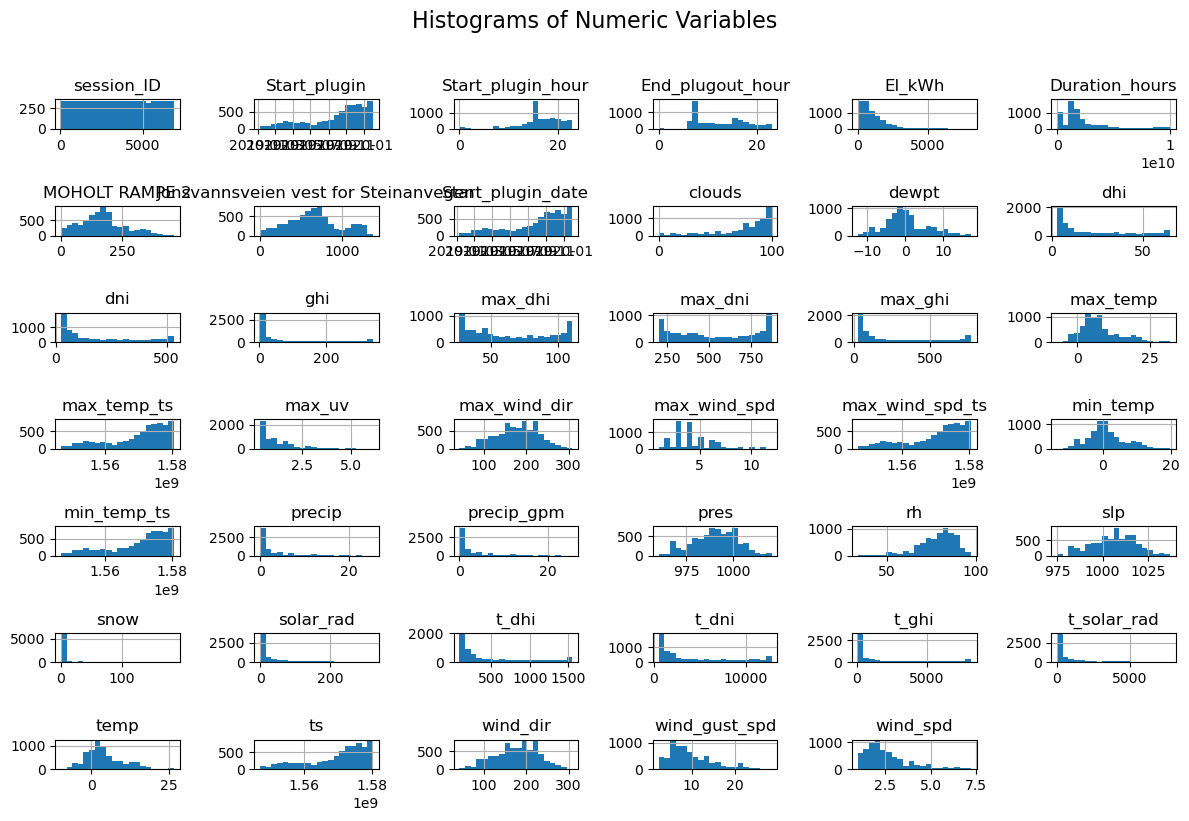

In [50]:
df_clean.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Variables", y=1.02, fontsize=16)
plt.tight_layout()

plt.show()

<Axes: xlabel='session_ID', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of session_ID')

Text(0.5, 0, 'session_ID')

<Axes: xlabel='Start_plugin_hour', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Start_plugin_hour')

Text(0.5, 0, 'Start_plugin_hour')

<Axes: xlabel='End_plugout_hour', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of End_plugout_hour')

Text(0.5, 0, 'End_plugout_hour')

<Axes: xlabel='El_kWh', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of El_kWh')

Text(0.5, 0, 'El_kWh')

<Axes: xlabel='Duration_hours', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Duration_hours')

Text(0.5, 0, 'Duration_hours')

<Axes: xlabel='MOHOLT RAMPE 2', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MOHOLT RAMPE 2')

Text(0.5, 0, 'MOHOLT RAMPE 2')

<Axes: xlabel='Jonsvannsveien vest for Steinanvegen', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Jonsvannsveien vest for Steinanvegen')

Text(0.5, 0, 'Jonsvannsveien vest for Steinanvegen')

<Axes: xlabel='clouds', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of clouds')

Text(0.5, 0, 'clouds')

<Axes: xlabel='dewpt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of dewpt')

Text(0.5, 0, 'dewpt')

<Axes: xlabel='dhi', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of dhi')

Text(0.5, 0, 'dhi')

<Axes: xlabel='dni', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of dni')

Text(0.5, 0, 'dni')

<Axes: xlabel='ghi', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of ghi')

Text(0.5, 0, 'ghi')

<Axes: xlabel='max_dhi', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_dhi')

Text(0.5, 0, 'max_dhi')

<Axes: xlabel='max_dni', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_dni')

Text(0.5, 0, 'max_dni')

<Axes: xlabel='max_ghi', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_ghi')

Text(0.5, 0, 'max_ghi')

<Axes: xlabel='max_temp', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_temp')

Text(0.5, 0, 'max_temp')

<Axes: xlabel='max_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_temp_ts')

Text(0.5, 0, 'max_temp_ts')

<Axes: xlabel='max_uv', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_uv')

Text(0.5, 0, 'max_uv')

<Axes: xlabel='max_wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_wind_dir')

Text(0.5, 0, 'max_wind_dir')

<Axes: xlabel='max_wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_wind_spd')

Text(0.5, 0, 'max_wind_spd')

<Axes: xlabel='max_wind_spd_ts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of max_wind_spd_ts')

Text(0.5, 0, 'max_wind_spd_ts')

<Axes: xlabel='min_temp', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of min_temp')

Text(0.5, 0, 'min_temp')

<Axes: xlabel='min_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of min_temp_ts')

Text(0.5, 0, 'min_temp_ts')

<Axes: xlabel='precip', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of precip')

Text(0.5, 0, 'precip')

<Axes: xlabel='precip_gpm', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of precip_gpm')

Text(0.5, 0, 'precip_gpm')

<Axes: xlabel='pres', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pres')

Text(0.5, 0, 'pres')

<Axes: xlabel='rh', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of rh')

Text(0.5, 0, 'rh')

<Axes: xlabel='slp', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of slp')

Text(0.5, 0, 'slp')

<Axes: xlabel='snow', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of snow')

Text(0.5, 0, 'snow')

<Axes: xlabel='solar_rad', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of solar_rad')

Text(0.5, 0, 'solar_rad')

<Axes: xlabel='t_dhi', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of t_dhi')

Text(0.5, 0, 't_dhi')

<Axes: xlabel='t_dni', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of t_dni')

Text(0.5, 0, 't_dni')

<Axes: xlabel='t_ghi', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of t_ghi')

Text(0.5, 0, 't_ghi')

<Axes: xlabel='t_solar_rad', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of t_solar_rad')

Text(0.5, 0, 't_solar_rad')

<Axes: xlabel='temp', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of temp')

Text(0.5, 0, 'temp')

<Axes: xlabel='ts', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of ts')

Text(0.5, 0, 'ts')

<Axes: xlabel='wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of wind_dir')

Text(0.5, 0, 'wind_dir')

<Axes: xlabel='wind_gust_spd', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of wind_gust_spd')

Text(0.5, 0, 'wind_gust_spd')

<Axes: xlabel='wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of wind_spd')

Text(0.5, 0, 'wind_spd')

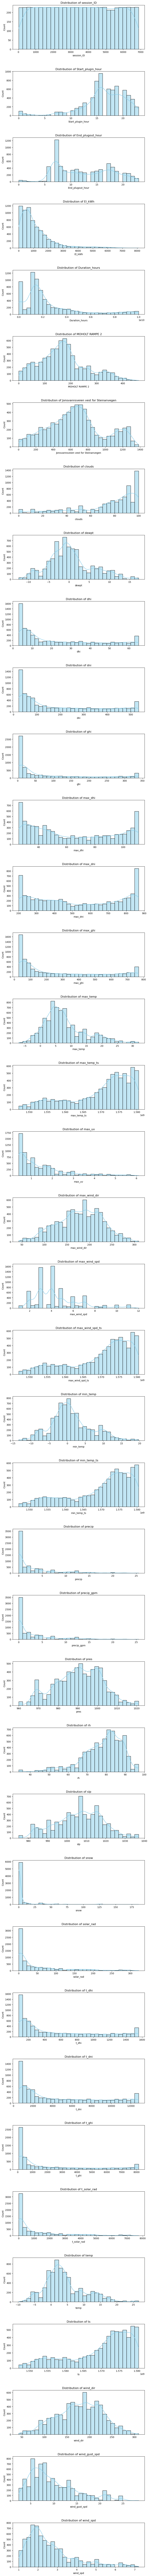

In [51]:
# Distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_columns):
    sns.histplot(df_clean[col], ax=axes[i], kde=True, bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.show()


<Axes: xlabel='session_ID'>

Text(0.5, 1.0, 'session_ID')

<Axes: xlabel='Start_plugin_hour'>

Text(0.5, 1.0, 'Start_plugin_hour')

<Axes: xlabel='End_plugout_hour'>

Text(0.5, 1.0, 'End_plugout_hour')

<Axes: xlabel='El_kWh'>

Text(0.5, 1.0, 'El_kWh')

<Axes: xlabel='Duration_hours'>

Text(0.5, 1.0, 'Duration_hours')

<Axes: xlabel='MOHOLT RAMPE 2'>

Text(0.5, 1.0, 'MOHOLT RAMPE 2')

<Axes: xlabel='Jonsvannsveien vest for Steinanvegen'>

Text(0.5, 1.0, 'Jonsvannsveien vest for Steinanvegen')

<Axes: xlabel='clouds'>

Text(0.5, 1.0, 'clouds')

<Axes: xlabel='dewpt'>

Text(0.5, 1.0, 'dewpt')

<Axes: xlabel='dhi'>

Text(0.5, 1.0, 'dhi')

<Axes: xlabel='dni'>

Text(0.5, 1.0, 'dni')

<Axes: xlabel='ghi'>

Text(0.5, 1.0, 'ghi')

<Axes: xlabel='max_dhi'>

Text(0.5, 1.0, 'max_dhi')

<Axes: xlabel='max_dni'>

Text(0.5, 1.0, 'max_dni')

<Axes: xlabel='max_ghi'>

Text(0.5, 1.0, 'max_ghi')

<Axes: xlabel='max_temp'>

Text(0.5, 1.0, 'max_temp')

<Axes: xlabel='max_temp_ts'>

Text(0.5, 1.0, 'max_temp_ts')

<Axes: xlabel='max_uv'>

Text(0.5, 1.0, 'max_uv')

<Axes: xlabel='max_wind_dir'>

Text(0.5, 1.0, 'max_wind_dir')

<Axes: xlabel='max_wind_spd'>

Text(0.5, 1.0, 'max_wind_spd')

<Axes: xlabel='max_wind_spd_ts'>

Text(0.5, 1.0, 'max_wind_spd_ts')

<Axes: xlabel='min_temp'>

Text(0.5, 1.0, 'min_temp')

<Axes: xlabel='min_temp_ts'>

Text(0.5, 1.0, 'min_temp_ts')

<Axes: xlabel='precip'>

Text(0.5, 1.0, 'precip')

<Axes: xlabel='precip_gpm'>

Text(0.5, 1.0, 'precip_gpm')

<Axes: xlabel='pres'>

Text(0.5, 1.0, 'pres')

<Axes: xlabel='rh'>

Text(0.5, 1.0, 'rh')

<Axes: xlabel='slp'>

Text(0.5, 1.0, 'slp')

<Axes: xlabel='snow'>

Text(0.5, 1.0, 'snow')

<Axes: xlabel='solar_rad'>

Text(0.5, 1.0, 'solar_rad')

<Axes: xlabel='t_dhi'>

Text(0.5, 1.0, 't_dhi')

<Axes: xlabel='t_dni'>

Text(0.5, 1.0, 't_dni')

<Axes: xlabel='t_ghi'>

Text(0.5, 1.0, 't_ghi')

<Axes: xlabel='t_solar_rad'>

Text(0.5, 1.0, 't_solar_rad')

<Axes: xlabel='temp'>

Text(0.5, 1.0, 'temp')

<Axes: xlabel='ts'>

Text(0.5, 1.0, 'ts')

<Axes: xlabel='wind_dir'>

Text(0.5, 1.0, 'wind_dir')

<Axes: xlabel='wind_gust_spd'>

Text(0.5, 1.0, 'wind_gust_spd')

<Axes: xlabel='wind_spd'>

Text(0.5, 1.0, 'wind_spd')

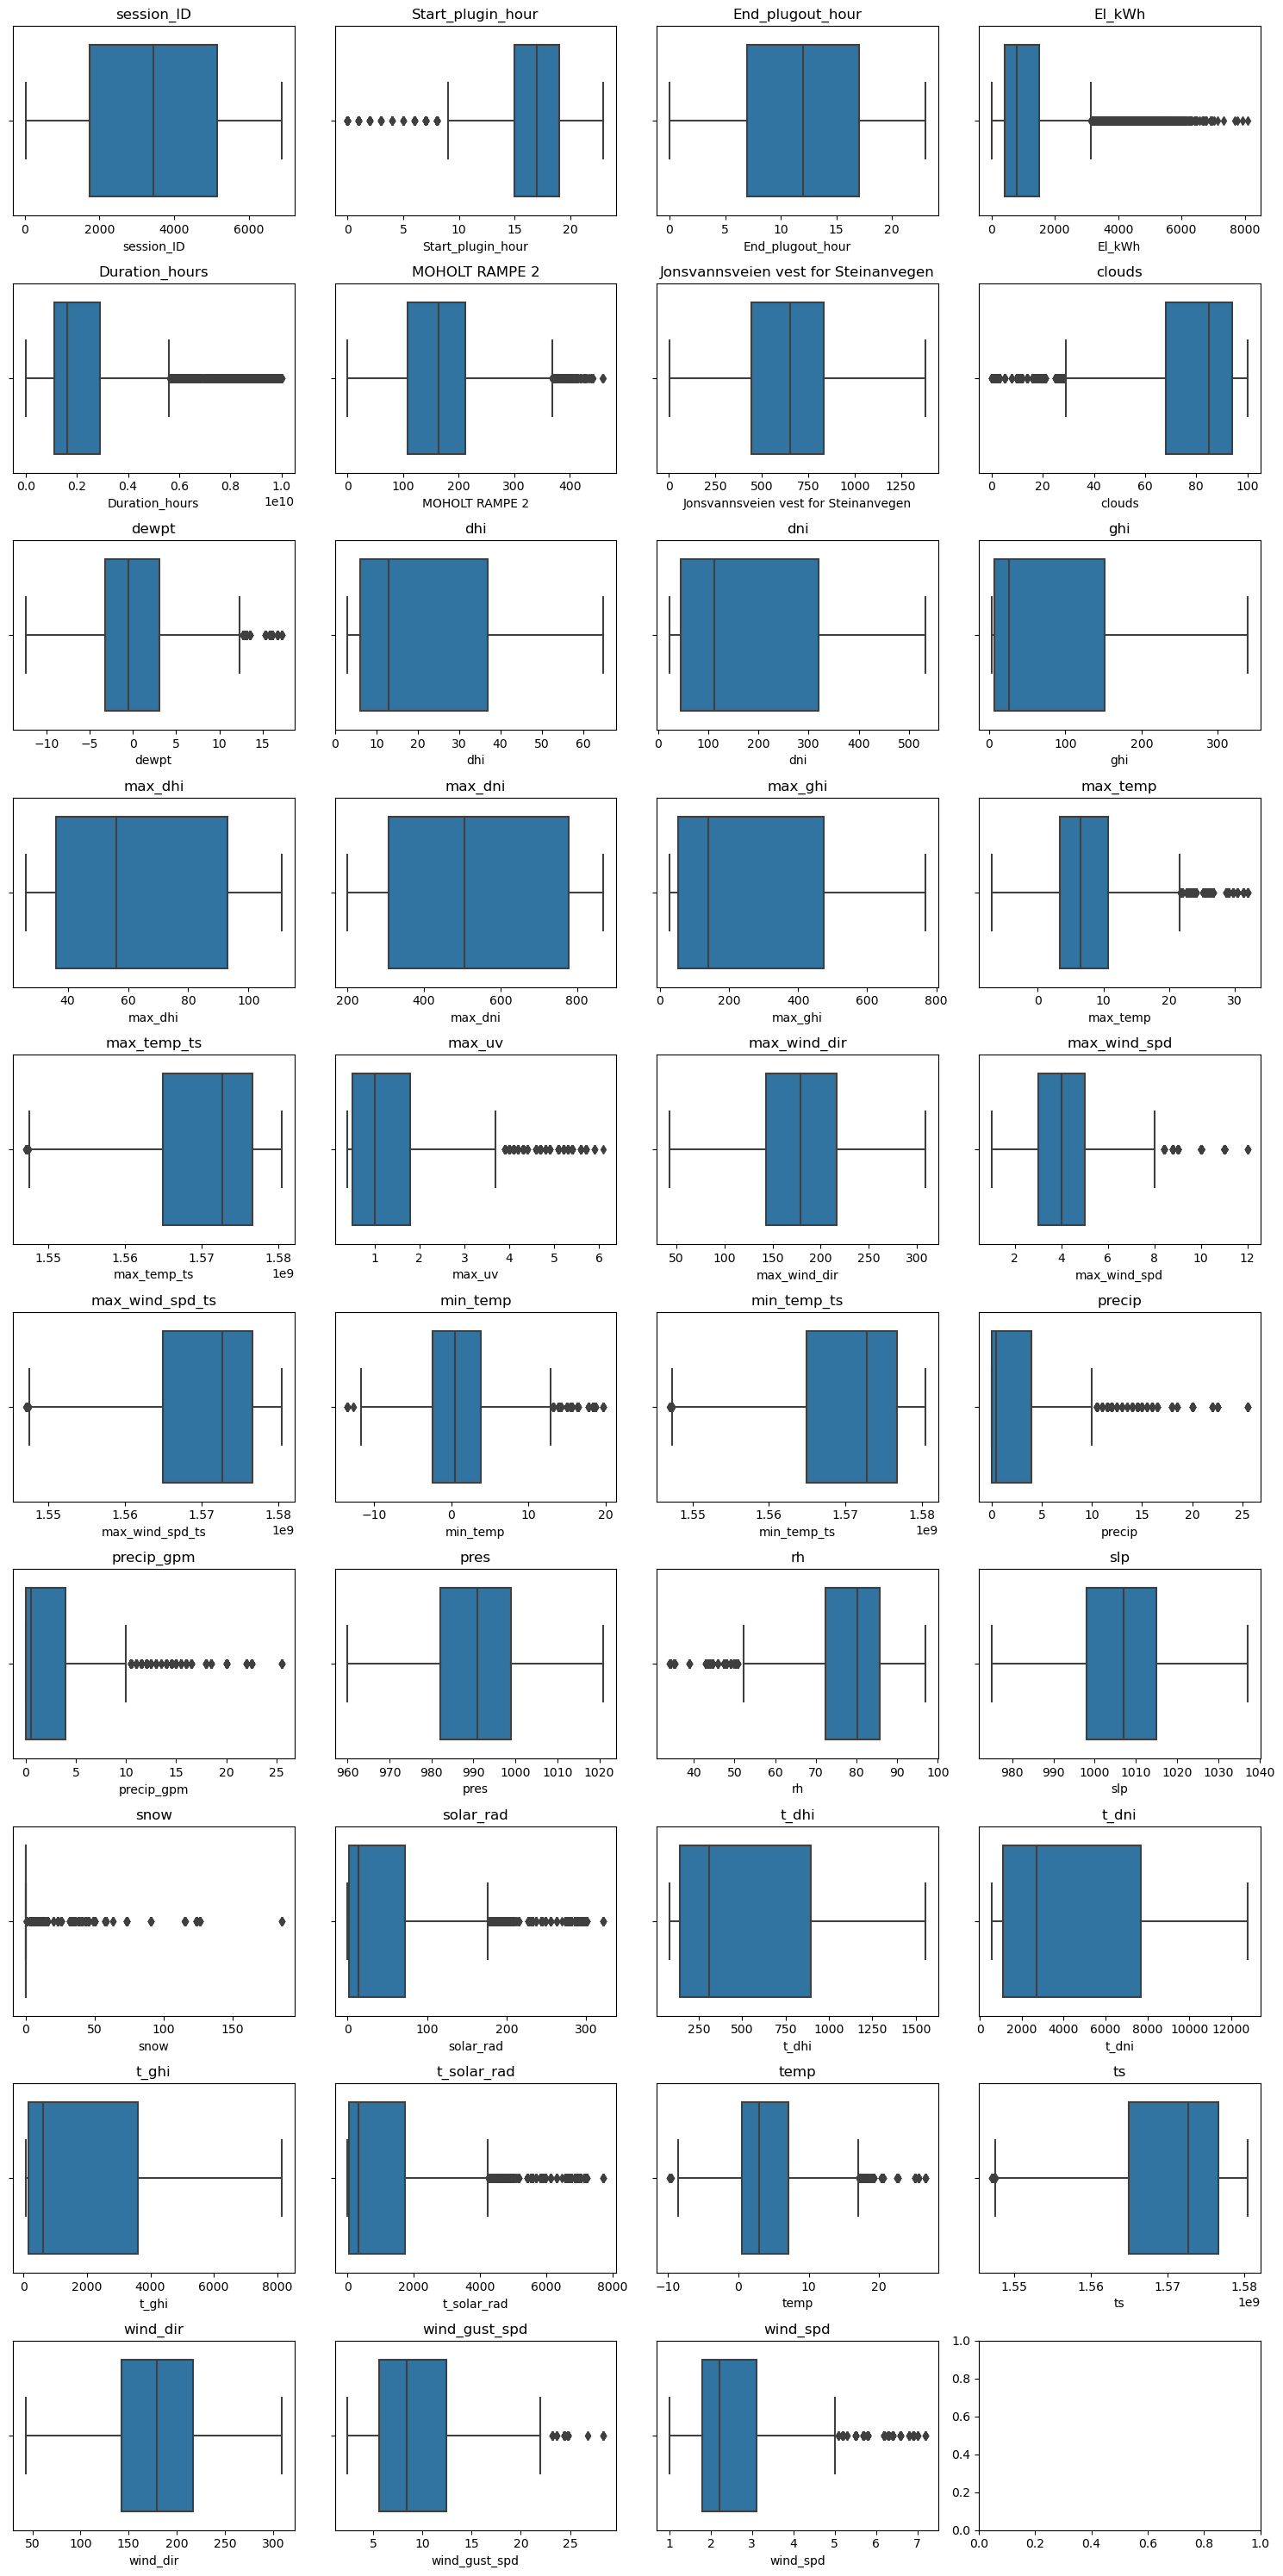

In [52]:
# Boxplot of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numerical columns
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for the subplot grid
n_columns = 4
n_rows = (len(numerical_columns) - 1) // n_columns + 1

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, n_rows * 3))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_clean[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


We can see distributions and outliers here. 

### Converting categorical variables to numeric.

In [53]:
df_clean_object_info = df_clean.select_dtypes(include=['object']).info()
print(df_clean_object_info)


<class 'pandas.core.frame.DataFrame'>
Index: 6819 entries, 0 to 87572
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Garage_ID          6819 non-null   object
 1   User_ID            6819 non-null   object
 2   User_type          6819 non-null   object
 3   Shared_ID          6819 non-null   object
 4   End_plugout        6819 non-null   object
 5   month_plugin       6819 non-null   object
 6   weekdays_plugin    6819 non-null   object
 7   Plugin_category    6819 non-null   object
 8   Duration_category  6819 non-null   object
 9   KROPPAN BRU        6819 non-null   object
 10  MOHOLTLIA          6819 non-null   object
 11  SELSBAKK           6819 non-null   object
 12  revision_status    6819 non-null   object
dtypes: object(13)
memory usage: 745.8+ KB
None


In [54]:
df_clean.select_dtypes(include=['object']).head()

,Garage_ID,User_ID,User_type,Shared_ID,End_plugout,month_plugin,weekdays_plugin,Plugin_category,Duration_category,KROPPAN BRU,MOHOLTLIA,SELSBAKK,revision_status
0,Bl2,Bl2-4,Private,Private,10.01.2019 10:20,Jan,Wednesday,late afternoon (15-18),Between 15 and 18 hours,4232,2223,629,final
11,AdO1,AdO1-2,Private,Private,10.01.2019 15:19,Jan,Wednesday,early evening (18-21),More than 18 hours,1772,818,334,final
27,UT9,Share-12,Shared,Shared-12,10.01.2019 17:20,Jan,Thursday,late afternoon (15-18),Less than 3 hours,4212,2233,660,final
29,AdO1,AdO1-2,Private,Private,11.01.2019 18:10,Jan,Thursday,late evening (21-midnight),More than 18 hours,443,197,108,final
49,UT9,Share-12,Shared,Shared-12,11.01.2019 17:07,Jan,Friday,late afternoon (15-18),Less than 3 hours,5180,2903,766,final


We need to do dummies, but first extract meaningfull information from features.
- User_type and shared_id are same. we can drop share_id, and transform user_type to binary (1,0).
- end_plugout to numeric
- month_plugin and weekdays_plugin to dummy
- plugin_category dummy by map 8 features, same with duration_category
- I would assume that revision_status can be dropped as it doesn't provide any meningfull information to us.
- KROPPAN BRU	MOHOLTLIA	SELSBAKK change type to int

In [55]:
df_clean['Garage_ID'].value_counts()
df_clean['User_ID'].value_counts()
df_clean['User_type'].value_counts()
df_clean['Shared_ID'].value_counts()
df_clean['End_plugout'].value_counts()
df_clean['month_plugin'].value_counts()
df_clean['weekdays_plugin'].value_counts()
df_clean['Plugin_category'].value_counts()
df_clean['Duration_category'].value_counts()
df_clean['KROPPAN BRU'].value_counts()
df_clean['MOHOLTLIA'].value_counts()
df_clean['SELSBAKK'].value_counts()
df_clean['revision_status'].value_counts()

Garage_ID
Bl2      2235
AsO2      665
AdO1      581
UT9       418
AdO3      362
UT7       311
MS1       270
AsO10     253
NR1       223
SR2       213
MS22      184
UT15      169
UT1       165
AdA6      155
SR14      105
AsO4      103
AsO8      103
Ris        99
AdA1       97
AsO6       39
UT2        28
Bl7        19
MS11       14
SR4         8
Name: count, dtype: int64

User_ID
Bl2-5       638
Bl2-2       317
Bl2-1       277
AsO2-1      214
AdO1-3      202
           ... 
Share-38      2
Share-39      2
Share-10      2
Share-19      1
Share-34      1
Name: count, Length: 96, dtype: int64

User_type
Private    5418
Shared     1401
Name: count, dtype: int64

Shared_ID
Private      5418
Shared-12     343
Shared-5      313
Shared-6      273
Shared-7      152
Shared-4      138
Shared-11      75
Shared-3       33
Shared-8       32
Shared-2       16
Shared-1       16
Shared-10       8
Shared-9        2
Name: count, dtype: int64

End_plugout
05.11.2019 07:27    3
04.11.2019 07:30    3
03.12.2019 07:40    3
18.11.2019 07:26    3
28.01.2020 06:44    2
                   ..
16.09.2019 17:04    1
16.09.2019 11:50    1
16.09.2019 08:10    1
16.09.2019 08:09    1
31.01.2020 23:53    1
Name: count, Length: 6666, dtype: int64

month_plugin
Jan    1348
Nov    1107
Dec    1097
Oct     845
Sep     501
Aug     362
Apr     306
Mar     301
Jun     291
May     288
Jul     238
Feb     135
Name: count, dtype: int64

weekdays_plugin
Thursday     1063
Wednesday    1031
Friday       1030
Monday        964
Sunday        950
Tuesday       934
Saturday      847
Name: count, dtype: int64

Plugin_category
late afternoon (15-18)        2344
early evening (18-21)         1829
late evening (21-midnight)    1026
early afternoon (12-15)        898
late morning (9-12)            344
early morning (6-9)            178
early night (midnight-3)       167
late night (3-6)                33
Name: count, dtype: int64

Duration_category
Less than 3 hours          1821
More than 18 hours         1063
Between 9 and 12 hours     1005
Between 12 and 15 hours     917
Between 3 and 6 hours       895
Between 15 and 18 hours     714
Between 6 and 9  hours      404
Name: count, dtype: int64

KROPPAN BRU
4357    20
4406    19
4364    17
3404    17
4295    15
        ..
3331     1
184      1
2682     1
487      1
1351     1
Name: count, Length: 2290, dtype: int64

MOHOLTLIA
1328    21
1590    21
849     20
671     19
1374    18
        ..
1088     1
116      1
1368     1
1564     1
2223     1
Name: count, Length: 1718, dtype: int64

SELSBAKK
454    41
444    37
432    34
645    31
557    30
       ..
810     1
179     1
100     1
597     1
56      1
Name: count, Length: 803, dtype: int64

revision_status
final    6819
Name: count, dtype: int64

revision_status has only one value, that wouldn't make any sense in our work. So we will drop it

In [56]:
df_clean = df_clean.drop(['revision_status'],axis=1)


<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Columns in df_clean')

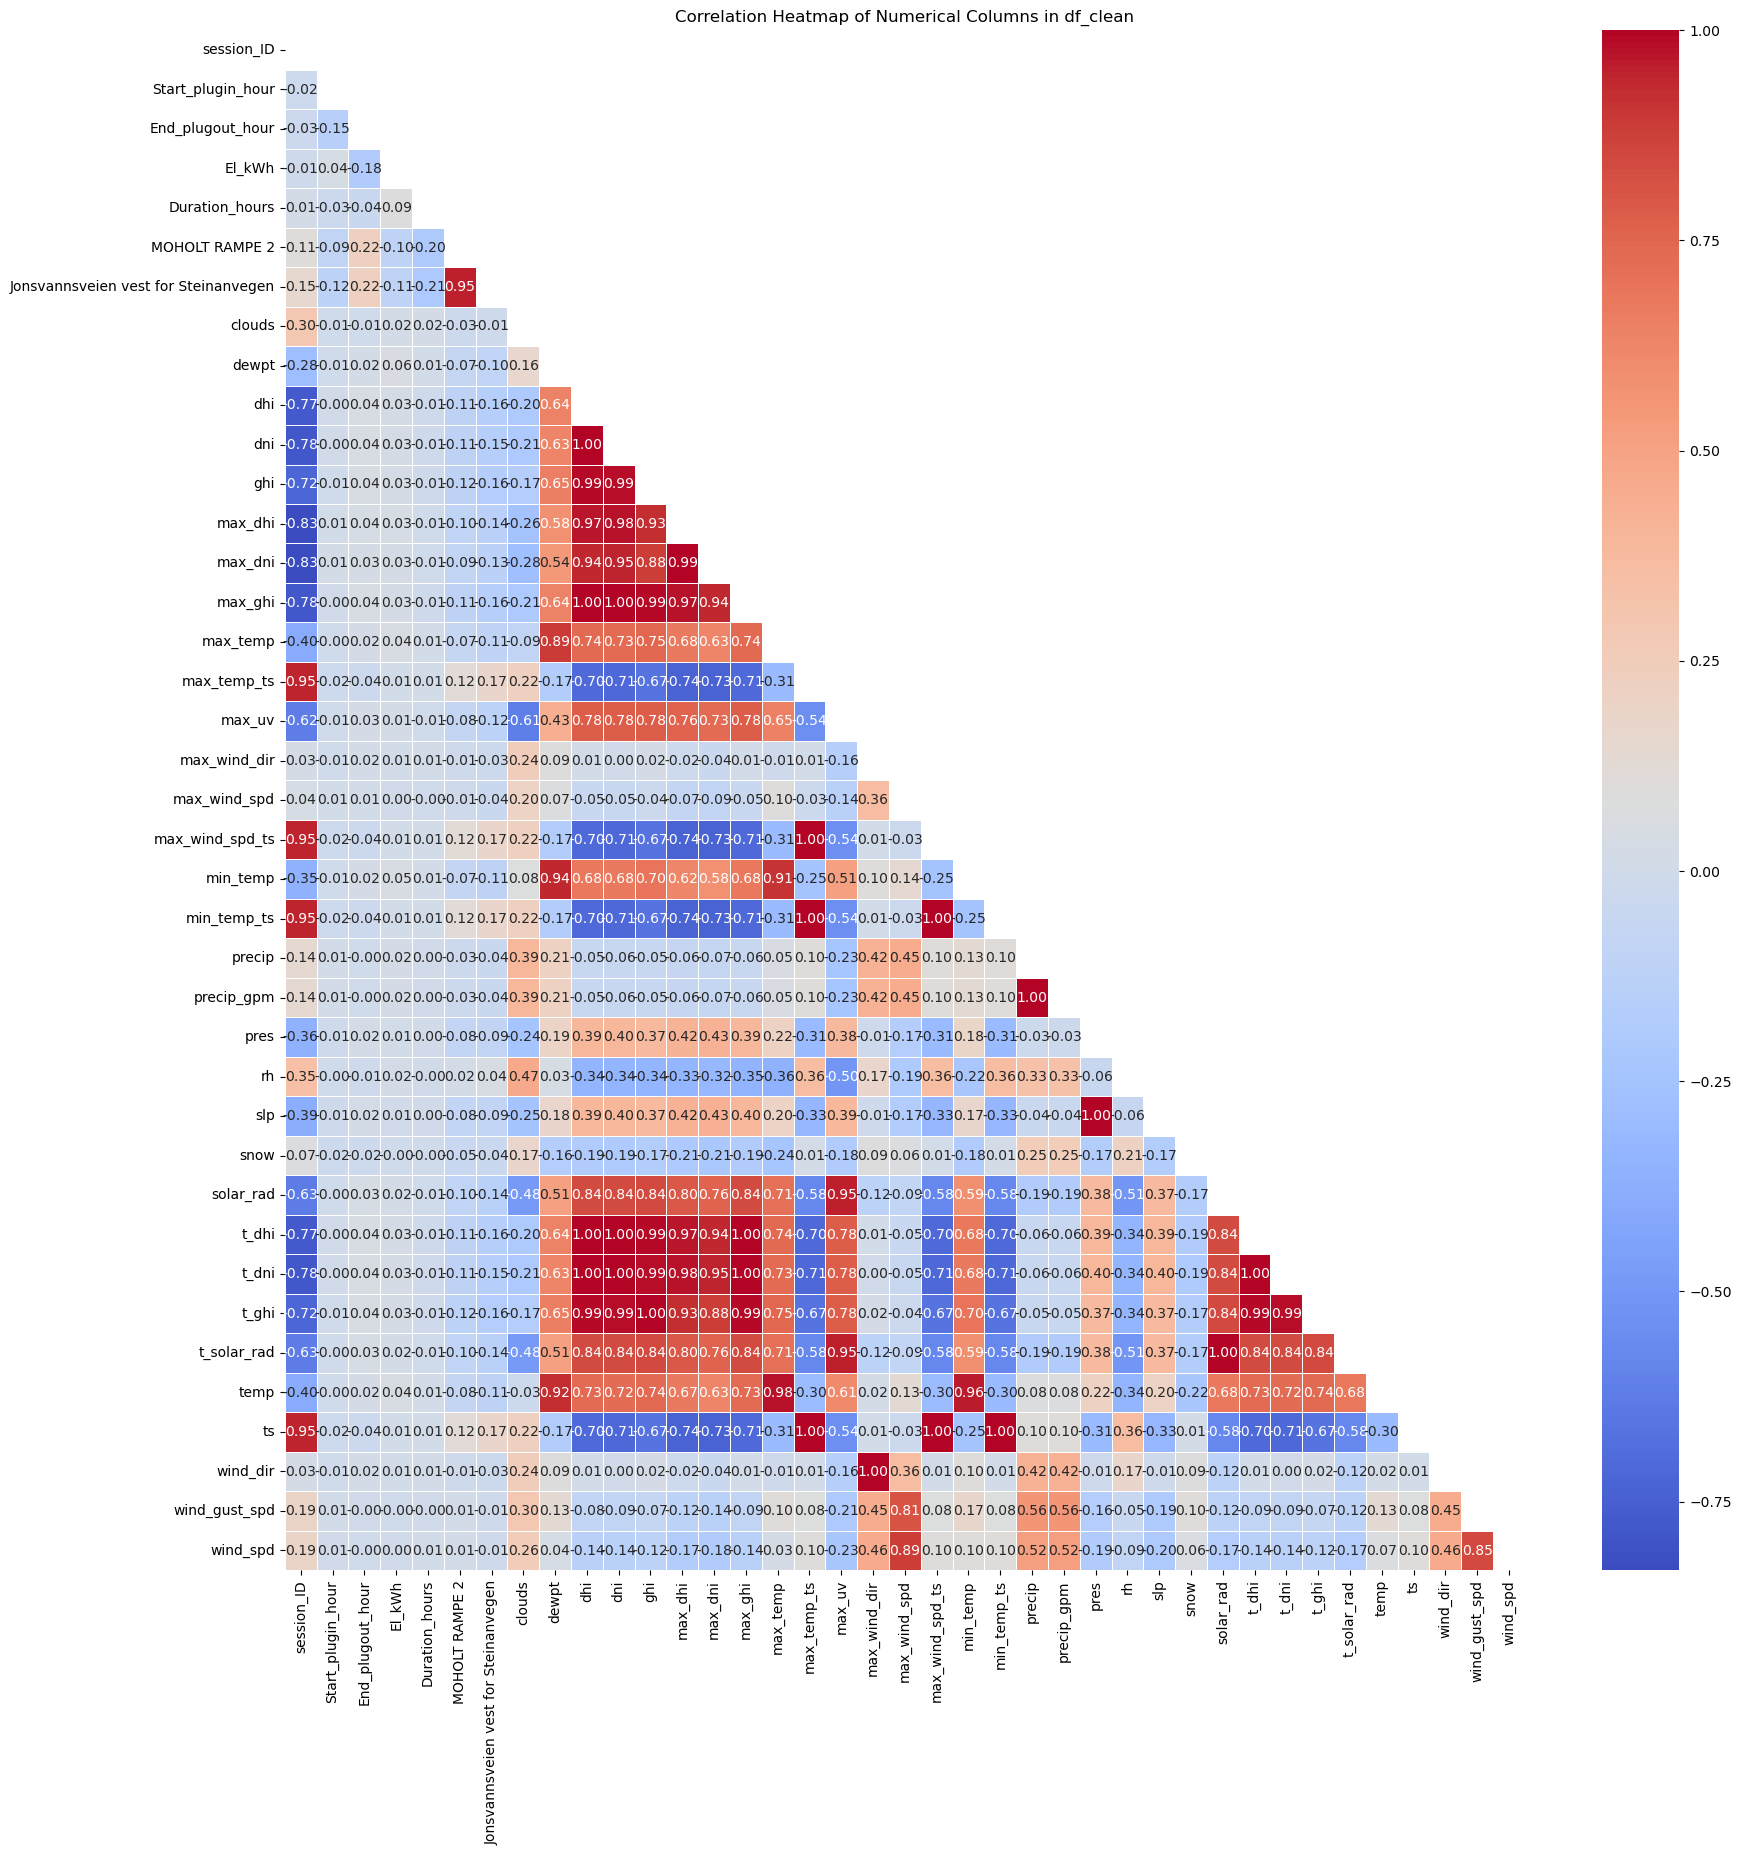

In [57]:
# Select numerical columns
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Filter the dataframe to include only numerical columns
df_numerical = df_clean[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Mask for upper-triangular
mask = np.triu(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)

# Show the plot
plt.title("Correlation Heatmap of Numerical Columns in df_clean")
plt.show()


In [58]:
df_numerical.corr()

,session_ID,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,clouds,dewpt,dhi,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
session_ID,1.000000,-1.590463e-02,-0.032773,-0.011798,0.013479,0.105148,0.150766,0.298537,-0.283176,-0.773209,...,-0.631003,-0.772959,-7.837855e-01,-0.722459,-0.630870,-0.399497,0.946522,0.027433,0.185262,0.190419
Start_plugin_hour,-0.015905,1.000000e+00,-0.148461,0.037490,-0.030474,-0.089349,-0.117502,-0.005901,-0.005894,-0.001054,...,-0.003700,-0.001351,-7.677825e-07,-0.006473,-0.003674,-0.004072,-0.017060,-0.008694,0.008348,0.005181
End_plugout_hour,-0.032773,-1.484607e-01,1.000000,-0.183876,-0.037561,0.220607,0.221783,-0.008368,0.016403,0.042268,...,0.034623,0.042093,4.151936e-02,0.044152,0.034778,0.021176,-0.035147,0.016971,-0.000345,-0.003975
El_kWh,-0.011798,3.748988e-02,-0.183876,1.000000,0.087639,-0.104227,-0.108082,0.017943,0.055018,0.033417,...,0.018335,0.033433,3.380401e-02,0.032001,0.018262,0.044522,0.007747,0.009186,-0.003151,0.000087
Duration_hours,0.013479,-3.047422e-02,-0.037561,0.087639,1.000000,-0.201499,-0.207106,0.015256,0.005752,-0.009803,...,-0.005845,-0.009641,-9.567008e-03,-0.009753,-0.005812,0.006703,0.012304,0.008873,-0.000515,0.007238
MOHOLT RAMPE 2,0.105148,-8.934928e-02,0.220607,-0.104227,-0.201499,1.000000,0.951494,-0.029117,-0.071703,-0.112584,...,-0.100838,-0.112960,-1.118178e-01,-0.116057,-0.100796,-0.076650,0.119929,-0.013068,0.011089,0.007205
Jonsvannsveien vest for Steinanvegen,0.150766,-1.175018e-01,0.221783,-0.108082,-0.207106,0.951494,1.000000,-0.011278,-0.099694,-0.156017,...,-0.142025,-0.156112,-1.542060e-01,-0.161882,-0.142061,-0.114395,0.171011,-0.028405,-0.012027,-0.011475
clouds,0.298537,-5.901000e-03,-0.008368,0.017943,0.015256,-0.029117,-0.011278,1.000000,0.162023,-0.201110,...,-0.482911,-0.200370,-2.089561e-01,-0.165448,-0.482912,-0.029318,0.221636,0.241723,0.295604,0.257518
dewpt,-0.283176,-5.893783e-03,0.016403,0.055018,0.005752,-0.071703,-0.099694,0.162023,1.000000,0.637227,...,0.509302,0.636951,6.318494e-01,0.650279,0.509478,0.924259,-0.171719,0.089963,0.130331,0.040231
dhi,-0.773209,-1.054137e-03,0.042268,0.033417,-0.009803,-0.112584,-0.156017,-0.201110,0.637227,1.000000,...,0.841072,0.999882,9.992765e-01,0.990645,0.841089,0.730400,-0.703538,0.008615,-0.084407,-0.136301


In [59]:
# Save the figure as an image
plt.savefig('/Users/zhassulan/Desktop/Capstone Project/correlation_heatmap.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

Saving clean data 

In [61]:
df_clean.to_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption.csv', index=False)

We will use dummie variables to convert categorical variables to numeric.

## Assumtion: all cars are same

Check for inbalance data. if it need to be scaled

scale and stratify

# Feature Engineering and Further Cleaning Steps...

### 1. Feature Engineering
- Extract datetime features

df['hour_of_day'] = df['Start_plugin'].dt.hour
df['day_of_week'] = df['Start_plugin'].dt.dayofweek
df['month'] = df['Start_plugin'].dt.month

### 2. Encoding Categorical Variables
- Example: One-hot encoding for 'User_type' column

df = pd.get_dummies(df, columns=['User_type'], prefix='user_type')

### 3. Correlation Analysis
- Explore the correlation matrix

correlation_matrix = df.corr()

### 4. Feature Scaling (if needed)
- Standardize or normalize numerical features

### 5. Handling Outliers
- Identify and handle outliers in numerical features

### 6. Check for Imbalanced Classes (if Classification)
- Explore the distribution of classes and handle imbalances

### 7. Check for Skewed Target Variable (if Regression)
- Address skewness if necessary using transformations

### 8. Other Steps Based on Data Characteristics
- Any other preprocessing steps based on insights from EDA

### Update X and y after adding new features or encoding
X = df.drop(['El_kWh'], axis=1)
y = df['El_kWh']


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='El_kWh', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Energy Consumption (El_kWh)')

Text(0.5, 0, 'Energy Consumption (El_kWh)')

Text(0, 0.5, 'Density')

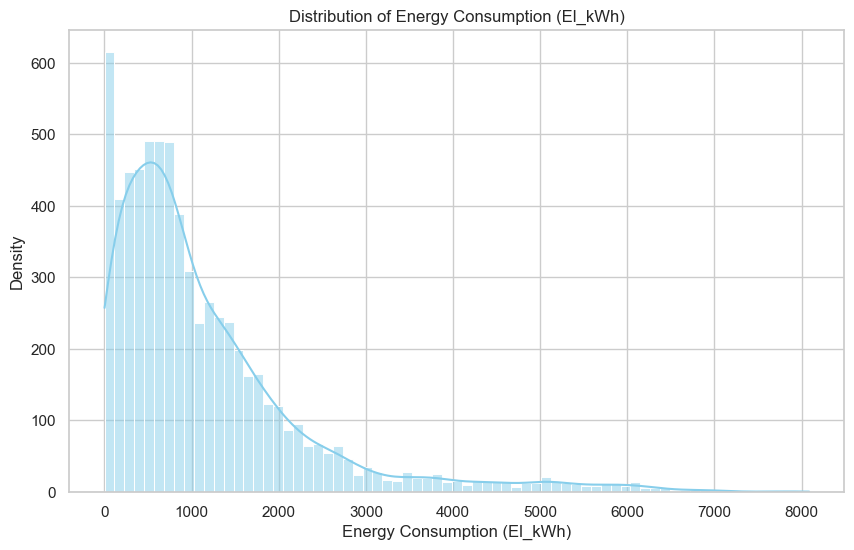

In [314]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['El_kWh'], kde=True, color='skyblue')
plt.title('Distribution of Energy Consumption (El_kWh)')
plt.xlabel('Energy Consumption (El_kWh)')
plt.ylabel('Density')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='El_kWh'>

Text(0.5, 1.0, 'Boxplot of Energy Consumption (El_kWh)')

Text(0.5, 0, 'Energy Consumption (El_kWh)')

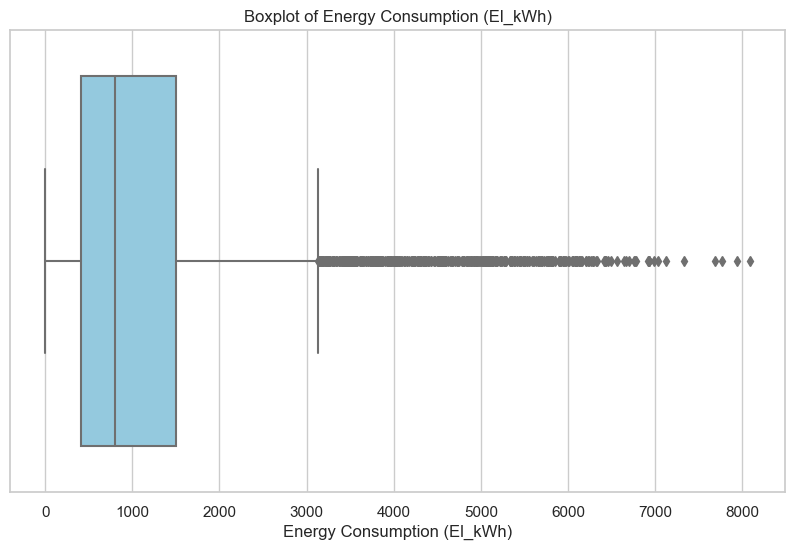

In [315]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['El_kWh'], color='skyblue')
plt.title('Boxplot of Energy Consumption (El_kWh)')
plt.xlabel('Energy Consumption (El_kWh)')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by Category')

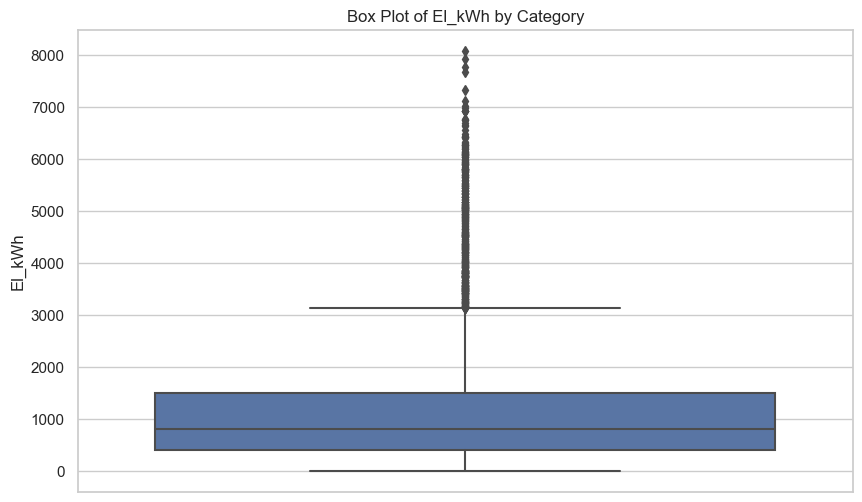

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Category' is a categorical feature in your DataFrame
# Replace 'Category' with the actual column name representing your category
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Example box plot
sns.boxplot(x=df_clean_object_info, y='El_kWh', data=df_clean)
plt.title('Box Plot of El_kWh by Category')
plt.show()




<Axes: xlabel='Garage_ID', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by Garage_ID')

Text(0.5, 0, 'Garage_ID')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='User_ID', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by User_ID')

Text(0.5, 0, 'User_ID')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='User_type', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by User_type')

Text(0.5, 0, 'User_type')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='Shared_ID', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by Shared_ID')

Text(0.5, 0, 'Shared_ID')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='End_plugout', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by End_plugout')

Text(0.5, 0, 'End_plugout')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='month_plugin', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by month_plugin')

Text(0.5, 0, 'month_plugin')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='weekdays_plugin', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by weekdays_plugin')

Text(0.5, 0, 'weekdays_plugin')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='Plugin_category', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by Plugin_category')

Text(0.5, 0, 'Plugin_category')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='Duration_category', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by Duration_category')

Text(0.5, 0, 'Duration_category')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='KROPPAN BRU', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by KROPPAN BRU')

Text(0.5, 0, 'KROPPAN BRU')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='MOHOLTLIA', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by MOHOLTLIA')

Text(0.5, 0, 'MOHOLTLIA')

Text(0, 0.5, 'El_kWh')

<Axes: xlabel='SELSBAKK', ylabel='El_kWh'>

Text(0.5, 1.0, 'Box Plot of El_kWh by SELSBAKK')

Text(0.5, 0, 'SELSBAKK')

Text(0, 0.5, 'El_kWh')

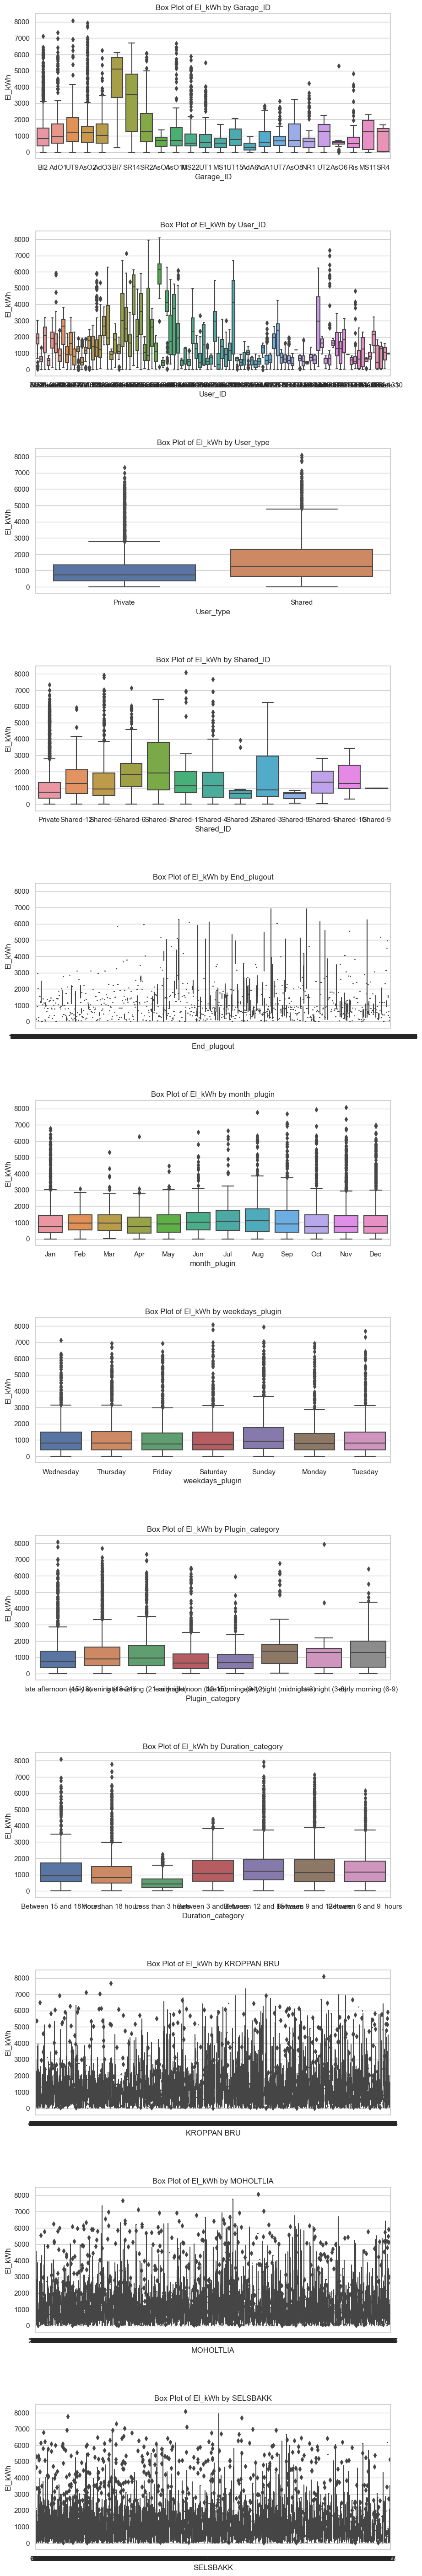

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of categorical columns in the DataFrame
categorical_columns = df_clean.select_dtypes(include=['object']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 6 * len(categorical_columns)))
fig.subplots_adjust(hspace=0.5)

# Loop through each categorical column and create a box plot
for i, column in enumerate(categorical_columns):
    sns.boxplot(x=column, y='El_kWh', data=df_clean, ax=axes[i])
    axes[i].set_title(f'Box Plot of El_kWh by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('El_kWh')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of categorical columns in the DataFrame
categorical_columns = df_clean.select_dtypes(include=['object']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 6 * len(categorical_columns)))
fig.subplots_adjust(hspace=0.5)

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    
    # Histogram
    sns.histplot(x=column, data=df_clean, hue='El_kWh', ax=axes[i], kde=True, bins=30, color='skyblue')
    axes[i].set_title(f'Histogram of El_kWh by {column}')
    axes[i].set_xlabel('El_kWh')
    axes[i].set_ylabel('Density')

    plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='El_kWh'>

Text(0.5, 1.0, 'Violin Plot of El_kWh by Category')

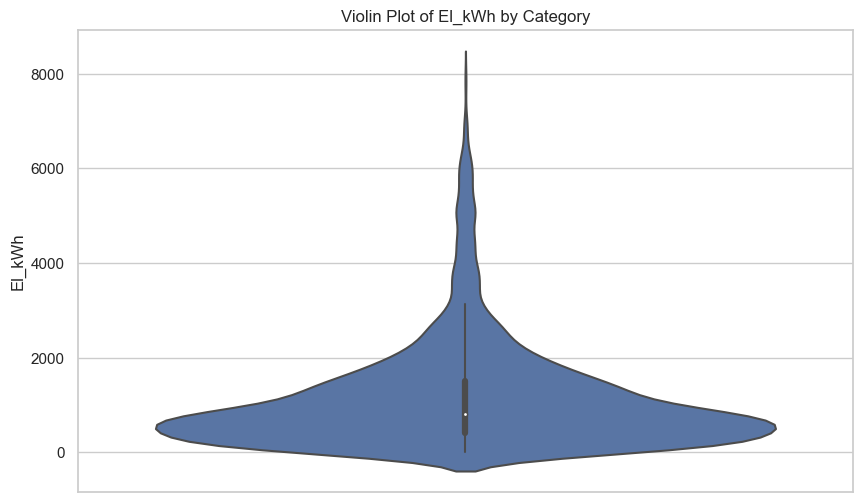

In [231]:
# Example violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_clean_object_info, y='El_kWh', data=df_clean)
plt.title('Violin Plot of El_kWh by Category')
plt.show()

In [233]:
print(df_clean.columns)

Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category', 'KROPPAN BRU', 'MOHOLTLIA',
       'SELSBAKK', 'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen',
       'Start_plugin_date', 'clouds', 'dewpt', 'dhi', 'dni', 'ghi', 'max_dhi',
       'max_dni', 'max_ghi', 'max_temp', 'max_temp_ts', 'max_uv',
       'max_wind_dir', 'max_wind_spd', 'max_wind_spd_ts', 'min_temp',
       'min_temp_ts', 'precip', 'precip_gpm', 'pres', 'rh', 'slp', 'snow',
       'solar_rad', 't_dhi', 't_dni', 't_ghi', 't_solar_rad', 'temp', 'ts',
       'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Energy Consumption Over Time')

Text(0.5, 0, 'Timestamp')

Text(0, 0.5, 'El_kWh')

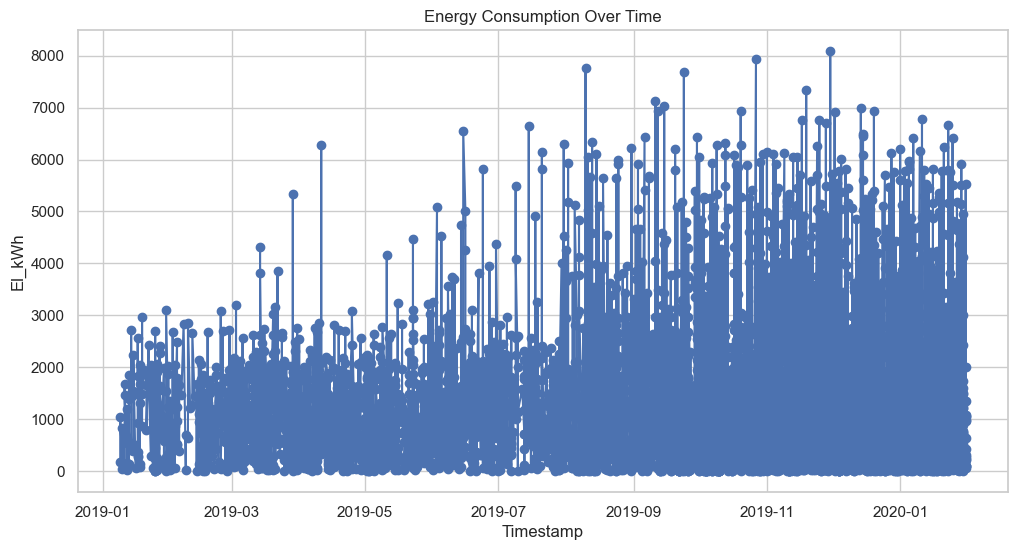

In [234]:
import matplotlib.pyplot as plt

# Assuming 'Start_plugin_date' is the column representing the timestamp
# Replace 'Start_plugin_date' with the actual column name in your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Start_plugin_date'], df_clean['El_kWh'], marker='o', linestyle='-')
plt.title('Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('El_kWh')
plt.grid(True)
plt.show()


<Figure size 1500x500 with 0 Axes>

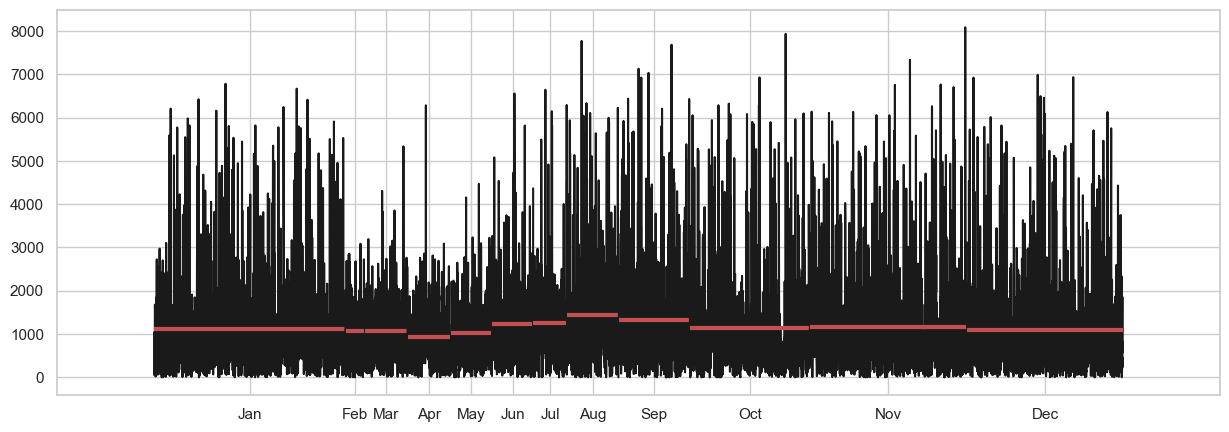

Text(0.5, 1.0, 'Seasonal Energy Consumption per Month')

Text(0.5, 4.444444444444445, 'Month')

Text(4.444444444444459, 0.5, 'El_kWh')

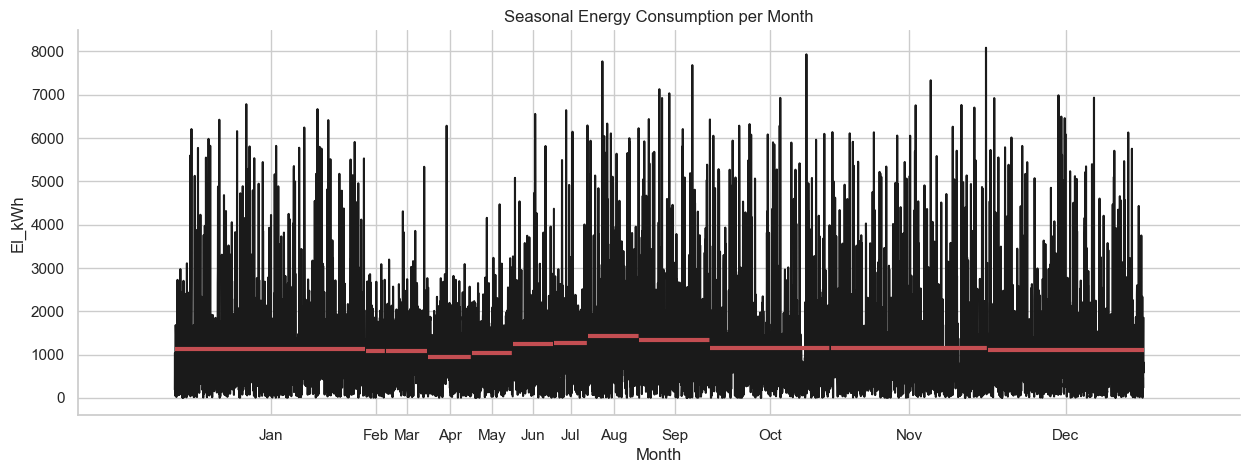

In [235]:
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize=(15, 5))

# Assuming 'Start_plugin_date' is the column representing the timestamp
# Replace 'Start_plugin_date' with the actual column name in your DataFrame
# Assuming 'El_kWh' is the column representing energy consumption
# Replace 'El_kWh' with the actual column name in your DataFrame
time_series = df_clean.set_index('Start_plugin_date')['El_kWh']

# Explicitly set the frequency to 'M' for monthly data
time_series.index = time_series.index.to_period('M')

month_plot(time_series, ax=plt.gca())

plt.title("Seasonal Energy Consumption per Month")
plt.xlabel("Month")
plt.ylabel("El_kWh")
plt.grid(True)
sns.despine()
plt.show()


### Feature engineering

**Date and Time Features:**
- Hour of the day
- Day of the week
- Month
- Year
- Weekend/weekday indicator
- Working/non-working hour indicator

**Temporal Features:**
- Lag features for energy consumption
- Rolling mean and rolling standard deviation for energy consumption

**Weather-Related Features:**
- Temperature
- Humidity
- Wind speed
- Precipitation
- Solar radiation
- Dew point

**Holiday Features:**
- Indicator for holidays
- Days before/after holidays

**Geographical Features:**
- Latitude and longitude

**Cyclical Features:**
- Encode cyclic time features using sine and cosine transformations (e.g., hour of the day, month)

**Interaction Terms:**
- Multiplicative or additive interactions between features
- Ratios between relevant features

**Feature Scaling:**
- Standardization or normalization of numerical features

**Outlier Handling:**
- Identification and handling of outliers

**Missing Data Handling:**
- Imputation or removal of missing data

**Domain-Specific Features:**
- Features relevant to the specific domain of energy consumption (e.g., industrial production, occupancy rates)

**PCA (Principal Component Analysis):**
- Dimensionality reduction for a large number of features

Anlysing `date` features

In [236]:
df_clean[['Start_plugin','month_plugin', 'weekdays_plugin', 'Start_plugin_date', 'Start_plugin_hour', 'End_plugout','End_plugout_hour',]].head()


,Start_plugin,month_plugin,weekdays_plugin,Start_plugin_date,Start_plugin_hour,End_plugout,End_plugout_hour
0,2019-01-09 16:00:00,Jan,Wednesday,2019-01-09,16,10.01.2019 10:20,10.0
11,2019-01-09 20:00:00,Jan,Wednesday,2019-01-09,20,10.01.2019 15:19,15.0
27,2019-01-10 16:00:00,Jan,Thursday,2019-01-10,16,10.01.2019 17:20,17.0
29,2019-01-10 23:00:00,Jan,Thursday,2019-01-10,23,11.01.2019 18:10,18.0
49,2019-01-11 15:00:00,Jan,Friday,2019-01-11,15,11.01.2019 17:07,17.0


By analyzing features that represent data values, we can see that they have diffrenet type. Also we can see that `Start_plugin` feature is been extracted to create new columns as: `month_plugin, weekdays_plugin, Start_plugin_date, Start_plugin_hour`.

Now we need to see if need all this columns, which one we can drop and if we need to extract new feature from `End_plugout`.